### tSNE representation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig

In [2]:
# load datasets
input_fc = np.load("../model/middle_output/input_fc_xv.npy",allow_pickle=True) # (580, 1, 3904)
input_gcn = np.load("../model/middle_output/input_gcn.npy",allow_pickle=True) # (580,)
input_trans_f = np.load("../model/middle_output/input_trans_f.npy",allow_pickle=True) # (580, 1, 881, 1)
input_trans_xsa = np.load("../model/middle_output/input_trans_xsa.npy",allow_pickle=True) # (580, 1, 61, 20)
input_trans_xsb = np.load("../model/middle_output/input_trans_xsb.npy",allow_pickle=True) # (580, 1, 61, 20)
output_trans_f = np.load("../model/middle_output/trans_f_output.npy",allow_pickle=True) # (580, 1, 881, 1)
output_trans_xsa = np.load("../model/middle_output/trans_xsa_output.npy",allow_pickle=True) # (580, 1, 61, 20)
output_trans_xsb = np.load("../model/middle_output/trans_xsb_output.npy",allow_pickle=True) # (580, 1, 61, 20)
output_final = np.load("../model/middle_output/fc5_output.npy",allow_pickle=True) # (550, 1, 32)

In [3]:
# generate train set labels
train_evidence = pd.read_pickle('../datasets/middlefile/train_data_evidence.dataset')
label = np.array(train_evidence['label'])
print(label.shape)

(580,)


(580, 32)
(580, 2)


<Figure size 640x480 with 0 Axes>

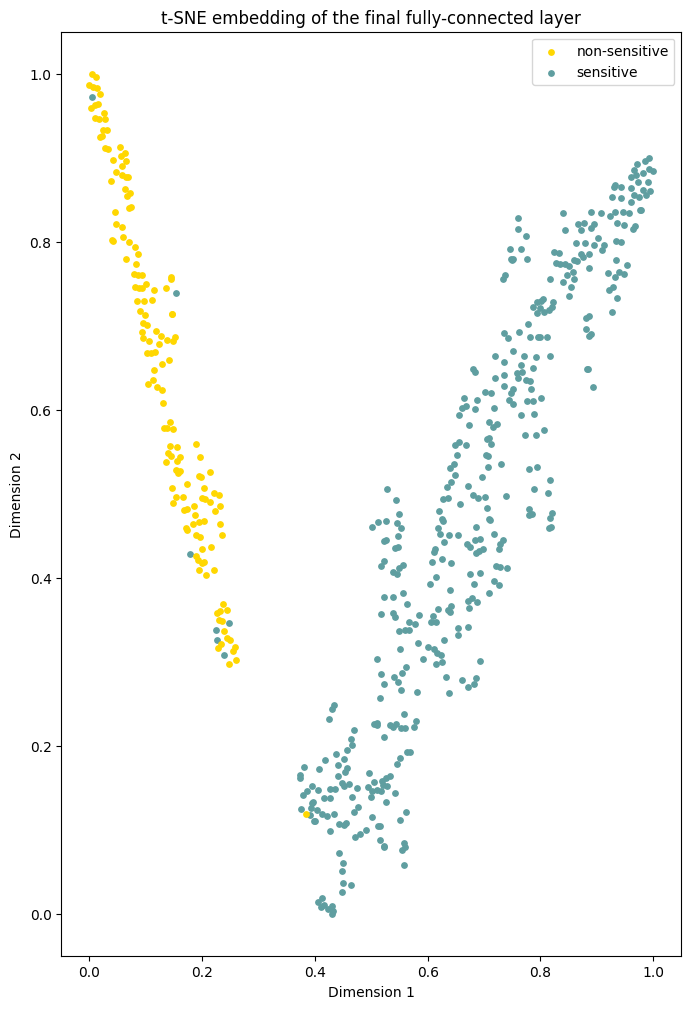

In [10]:
stack = np.sum(output_final, axis=1)

import warnings
warnings.filterwarnings('ignore')

fig = plt.figure()
tsne = TSNE(n_components=2, init='pca', random_state=0)
print(stack.shape)
result = tsne.fit_transform(stack)
print(result.shape)
#fig = plot_embedding(result, label,'t-SNE embedding of the digits')
x_min, x_max = np.min(result, 0), np.max(result, 0)
result = (result - x_min) / (x_max - x_min)

color = ["#FFD700","#5F9EA0"]
#color = ["#B0E0E6","#EE6363"]

ax = plt.subplots(figsize=(8,12))
for i in range(result.shape[0]):
    if(label[i] == 1):
        s2 = plt.scatter(result[i, 0], result[i, 1],s=15,color=color[label[i]])
for i in range(result.shape[0]):
    if(label[i] == 0):
        s1 = plt.scatter(result[i, 0], result[i, 1],s=15,color=color[label[i]])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE embedding of the final fully-connected layer')
plt.legend((s1,s2),('non-sensitive','sensitive') ,loc = 'best')
plt.savefig('images/tsne-final-fc.png',dpi=300)
plt.show()

(580, 3904)
(580, 2)


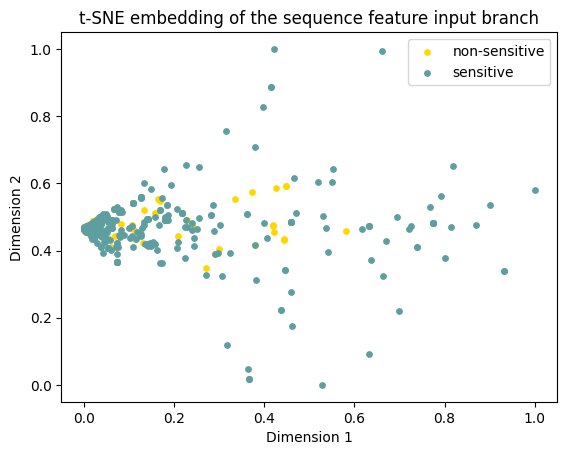

In [21]:
stack = np.sum(input_fc, axis=1)

import warnings
warnings.filterwarnings('ignore')

fig = plt.figure()
tsne = TSNE(n_components=2, init='pca', random_state=0)
print(stack.shape)
result = tsne.fit_transform(stack)
print(result.shape)
#fig = plot_embedding(result, label,'t-SNE embedding of the digits')
x_min, x_max = np.min(result, 0), np.max(result, 0)
result = (result - x_min) / (x_max - x_min)

color = ["#FFD700","#5F9EA0"]
#color = ["#B0E0E6","#EE6363"]

ax = plt.subplot(111)
for i in range(result.shape[0]):
    if(label[i] == 0):
        s1 = plt.scatter(result[i, 0], result[i, 1],s=15,color=color[label[i]])
for i in range(result.shape[0]):
    if(label[i] == 1):
        s2 = plt.scatter(result[i, 0], result[i, 1],s=15,color=color[label[i]])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE embedding of the sequence feature input branch')
plt.legend((s1,s2),('non-sensitive','sensitive') ,loc = 'best')
plt.savefig('images/tsne-input-fc.png',dpi=300)
plt.show()

(580, 881)
(580, 2)


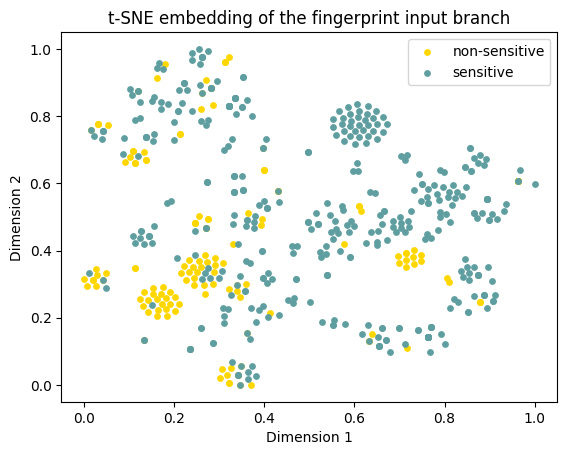

In [18]:
stack = np.sum(input_trans_f, axis=1)
stack = np.sum(stack, axis=2)

import warnings
warnings.filterwarnings('ignore')

fig = plt.figure()
tsne = TSNE(n_components=2, init='pca', random_state=0)
print(stack.shape)
result = tsne.fit_transform(stack)
print(result.shape)
#fig = plot_embedding(result, label,'t-SNE embedding of the digits')
x_min, x_max = np.min(result, 0), np.max(result, 0)
result = (result - x_min) / (x_max - x_min)

color = ["#FFD700","#5F9EA0"]
#color = ["#B0E0E6","#EE6363"]

ax = plt.subplot(111)
for i in range(result.shape[0]):
    if(label[i] == 0):
        s1 = plt.scatter(result[i, 0], result[i, 1],s=15,color=color[label[i]])
for i in range(result.shape[0]):
    if(label[i] == 1):
        s2 = plt.scatter(result[i, 0], result[i, 1],s=15,color=color[label[i]])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE embedding of the fingerprint input branch')
plt.legend((s1,s2),('non-sensitive','sensitive') ,loc = 'best')
plt.savefig('images/tsne-input-f.png',dpi=300)
plt.show()

(580, 61)
(580, 2)


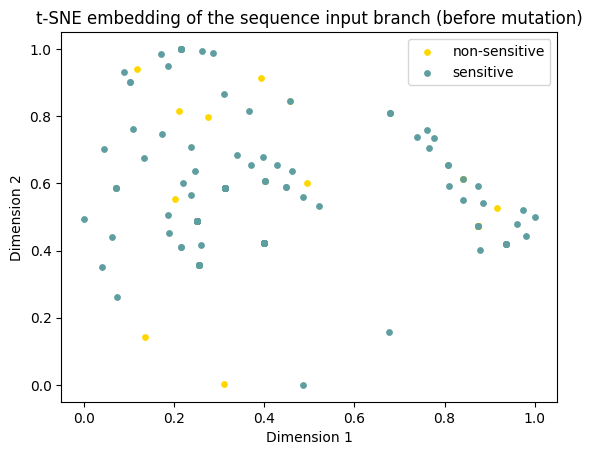

In [22]:
stack = np.sum(input_trans_xsb, axis=1)
stack = np.sum(stack, axis=2)

import warnings
warnings.filterwarnings('ignore')

fig = plt.figure()
tsne = TSNE(n_components=2, init='pca', random_state=0)
print(stack.shape)
result = tsne.fit_transform(stack)
print(result.shape)
#fig = plot_embedding(result, label,'t-SNE embedding of the digits')
x_min, x_max = np.min(result, 0), np.max(result, 0)
result = (result - x_min) / (x_max - x_min)

color = ["#FFD700","#5F9EA0"]
#color = ["#B0E0E6","#EE6363"]

ax = plt.subplot(111)
for i in range(result.shape[0]):
    if(label[i] == 0):
        s1 = plt.scatter(result[i, 0], result[i, 1],s=15,color=color[label[i]])
for i in range(result.shape[0]):
    if(label[i] == 1):
        s2 = plt.scatter(result[i, 0], result[i, 1],s=15,color=color[label[i]])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE embedding of the sequence input branch (before mutation)')
plt.legend((s1,s2),('non-sensitive','sensitive') ,loc = 'best')
plt.savefig('images/tsne-input-seqb.png',dpi=300)
plt.show()

(580, 61)
(580, 2)


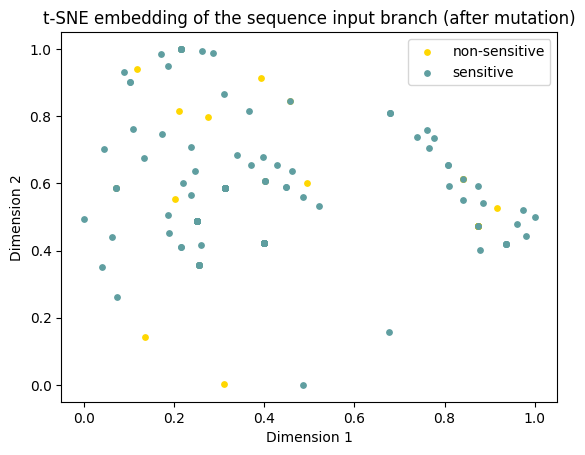

In [7]:
stack = np.sum(input_trans_xsa, axis=1)
stack = np.sum(stack, axis=2)

import warnings
warnings.filterwarnings('ignore')

fig = plt.figure()
tsne = TSNE(n_components=2, init='pca', random_state=0)
print(stack.shape)
result = tsne.fit_transform(stack)
print(result.shape)
#fig = plot_embedding(result, label,'t-SNE embedding of the digits')
x_min, x_max = np.min(result, 0), np.max(result, 0)
result = (result - x_min) / (x_max - x_min)

color = ["#FFD700","#5F9EA0"]
#color = ["#B0E0E6","#EE6363"]

ax = plt.subplot(111)
for i in range(result.shape[0]):
    if(label[i] == 0):
        s1 = plt.scatter(result[i, 0], result[i, 1],s=15,color=color[label[i]])
for i in range(result.shape[0]):
    if(label[i] == 1):
        s2 = plt.scatter(result[i, 0], result[i, 1],s=15,color=color[label[i]])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE embedding of the sequence input branch (after mutation)')
plt.legend((s1,s2),('non-sensitive','sensitive') ,loc = 'best')
plt.savefig('images/tsne-input-seqa.png',dpi=300)
plt.show()